# SNIS IPLA

## IPLA

In [13]:
import numpy as np
from tqdm import tqdm
from implementation import IPLA, SNIS_IPLA, PGD
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [14]:
def log_p_grad_theta(theta, x, y):
    D = x.shape[0]
    return -(np.sum(x) - D*theta)

def U(theta, Xi, y):
    D = np.shape(Xi)[0]
    return D * np.log(2*np.pi) + np.sum((Xi-theta)**2/2) + np.sum((y-Xi)**2/2)

def U_grad_X(theta, X, y):
    return -(-2*X + y + theta)

def U_grad_theta(theta, Xi, y):
    D = np.shape(Xi)[0]
    return D*(theta - np.mean(Xi))

def ave_grad_U_theta(theta, X, y):
    D, N = np.shape(X)
    return D*(theta - np.mean(X))

grads_U_IPLA = (ave_grad_U_theta, U_grad_X)
grads_U_SNIS = (U_grad_theta, U_grad_X)

In [15]:
D = 100
thdata = 1
nsteps = 2000
Nparticles = 10
opt_gamma = 1/(2+D)
IPLA_gamma = 0.01

y = np.random.normal(0,1, (D,1)) + np.random.normal(thdata, 1, (D,1))
th0  = np.array([0.0])
X0 = np.zeros((D, Nparticles))

import importlib
import implementation
importlib.reload(implementation)
IPLA_test_opt_gamma = IPLA(th0, X0, grads_U_IPLA, gamma=opt_gamma, y=y)
PGD_test_opt_gamma = PGD(th0, X0, grads_U_IPLA, gamma=opt_gamma, y=y)
for i in range(nsteps):
    IPLA_test_opt_gamma.iterate()
    PGD_test_opt_gamma.iterate()

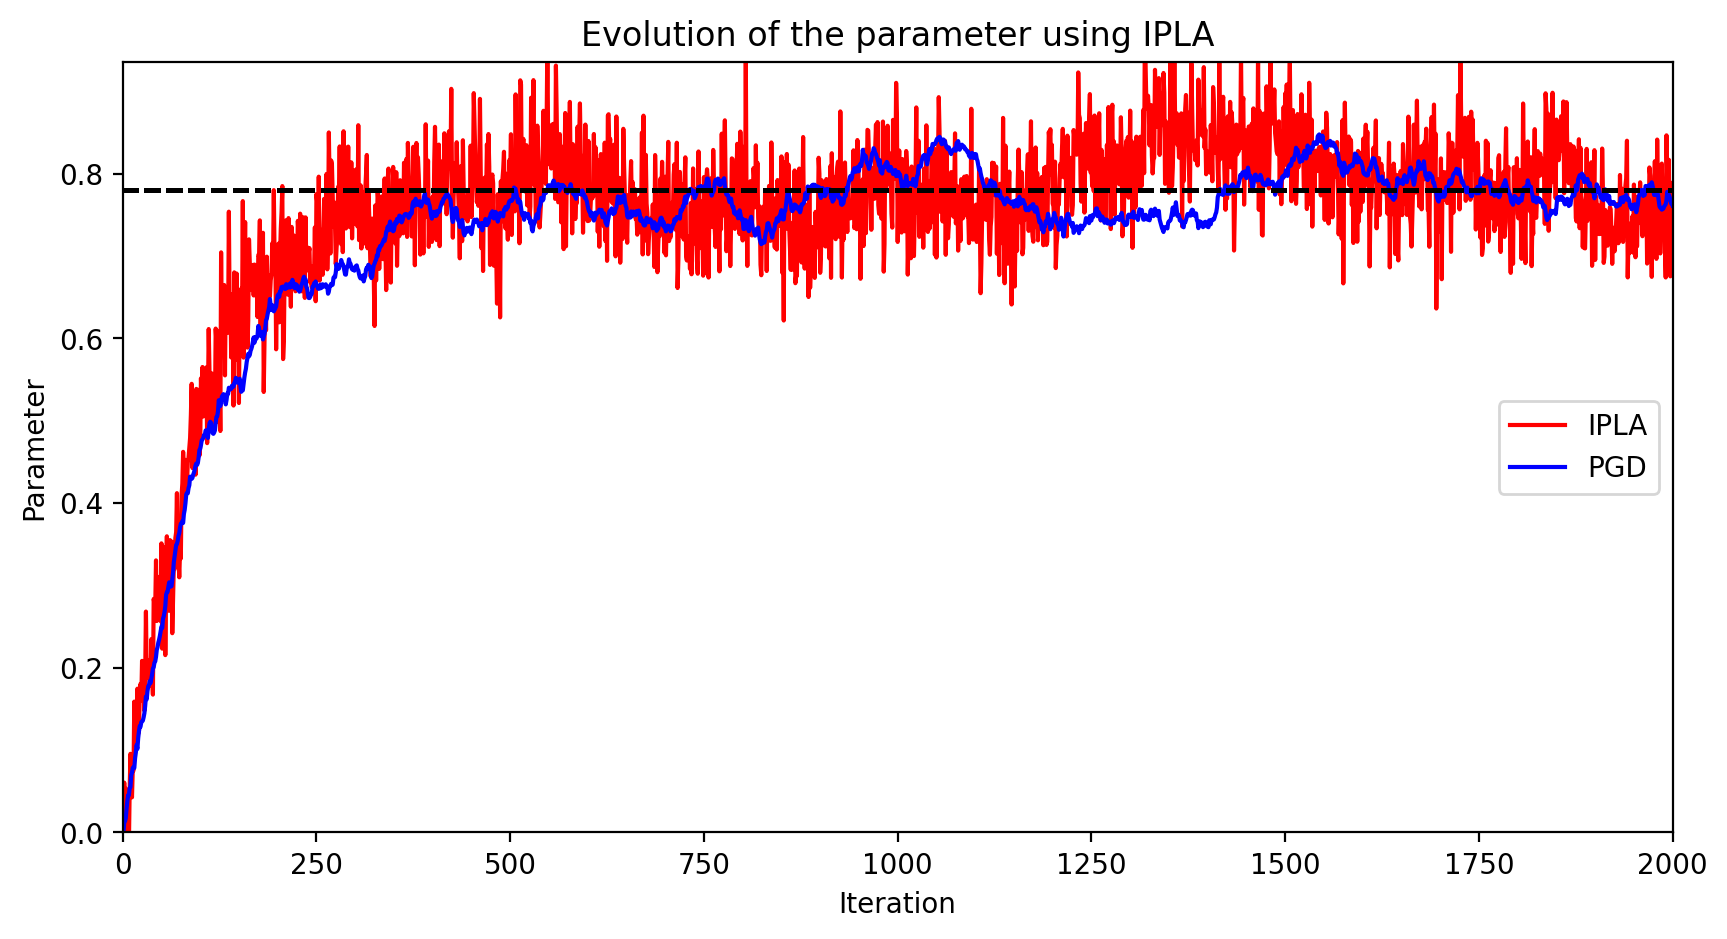

In [16]:
# Plot the results
best_theta = y.mean()*np.ones(nsteps)
plt.figure(figsize=(10, 5))
plt.plot(IPLA_test_opt_gamma.thetas, color = "red", label="IPLA")
plt.plot(PGD_test_opt_gamma.thetas, color = "blue", label="PGD")
plt.plot([best_theta]*nsteps, '--', color = "black")
plt.xlabel('Iteration')
plt.ylabel('Parameter')
plt.xlim([0, nsteps])
plt.title('Evolution of the parameter using IPLA')
plt.ylim([0, 1.2*y.mean()])
plt.xlim([0, nsteps])
plt.legend(loc='center right')
plt.show()

# SNIS IPLA

In [17]:
D = 100
thdata = 1
nsteps = 2000
Nparticles = 10
gamma_SNIS = 1/(2+D)

y = np.random.normal(0,1, (D,1)) + np.random.normal(thdata, 1, (D,1))
th0  = np.array([0.0])
X0 = np.zeros((D, Nparticles))

import importlib
import implementation
importlib.reload(implementation)
SNIS_IPLA_test = SNIS_IPLA(th0, X0, U, grads_U_SNIS, gamma=gamma_SNIS, y=y)
SNIS_IPLA_test.grad_U_X_fn(th0, X0[:,0])
for i in tqdm(range(nsteps)):
    SNIS_IPLA_test.iterate()

100%|██████████| 2000/2000 [00:01<00:00, 1972.21it/s]


<Figure size 2000x1000 with 0 Axes>

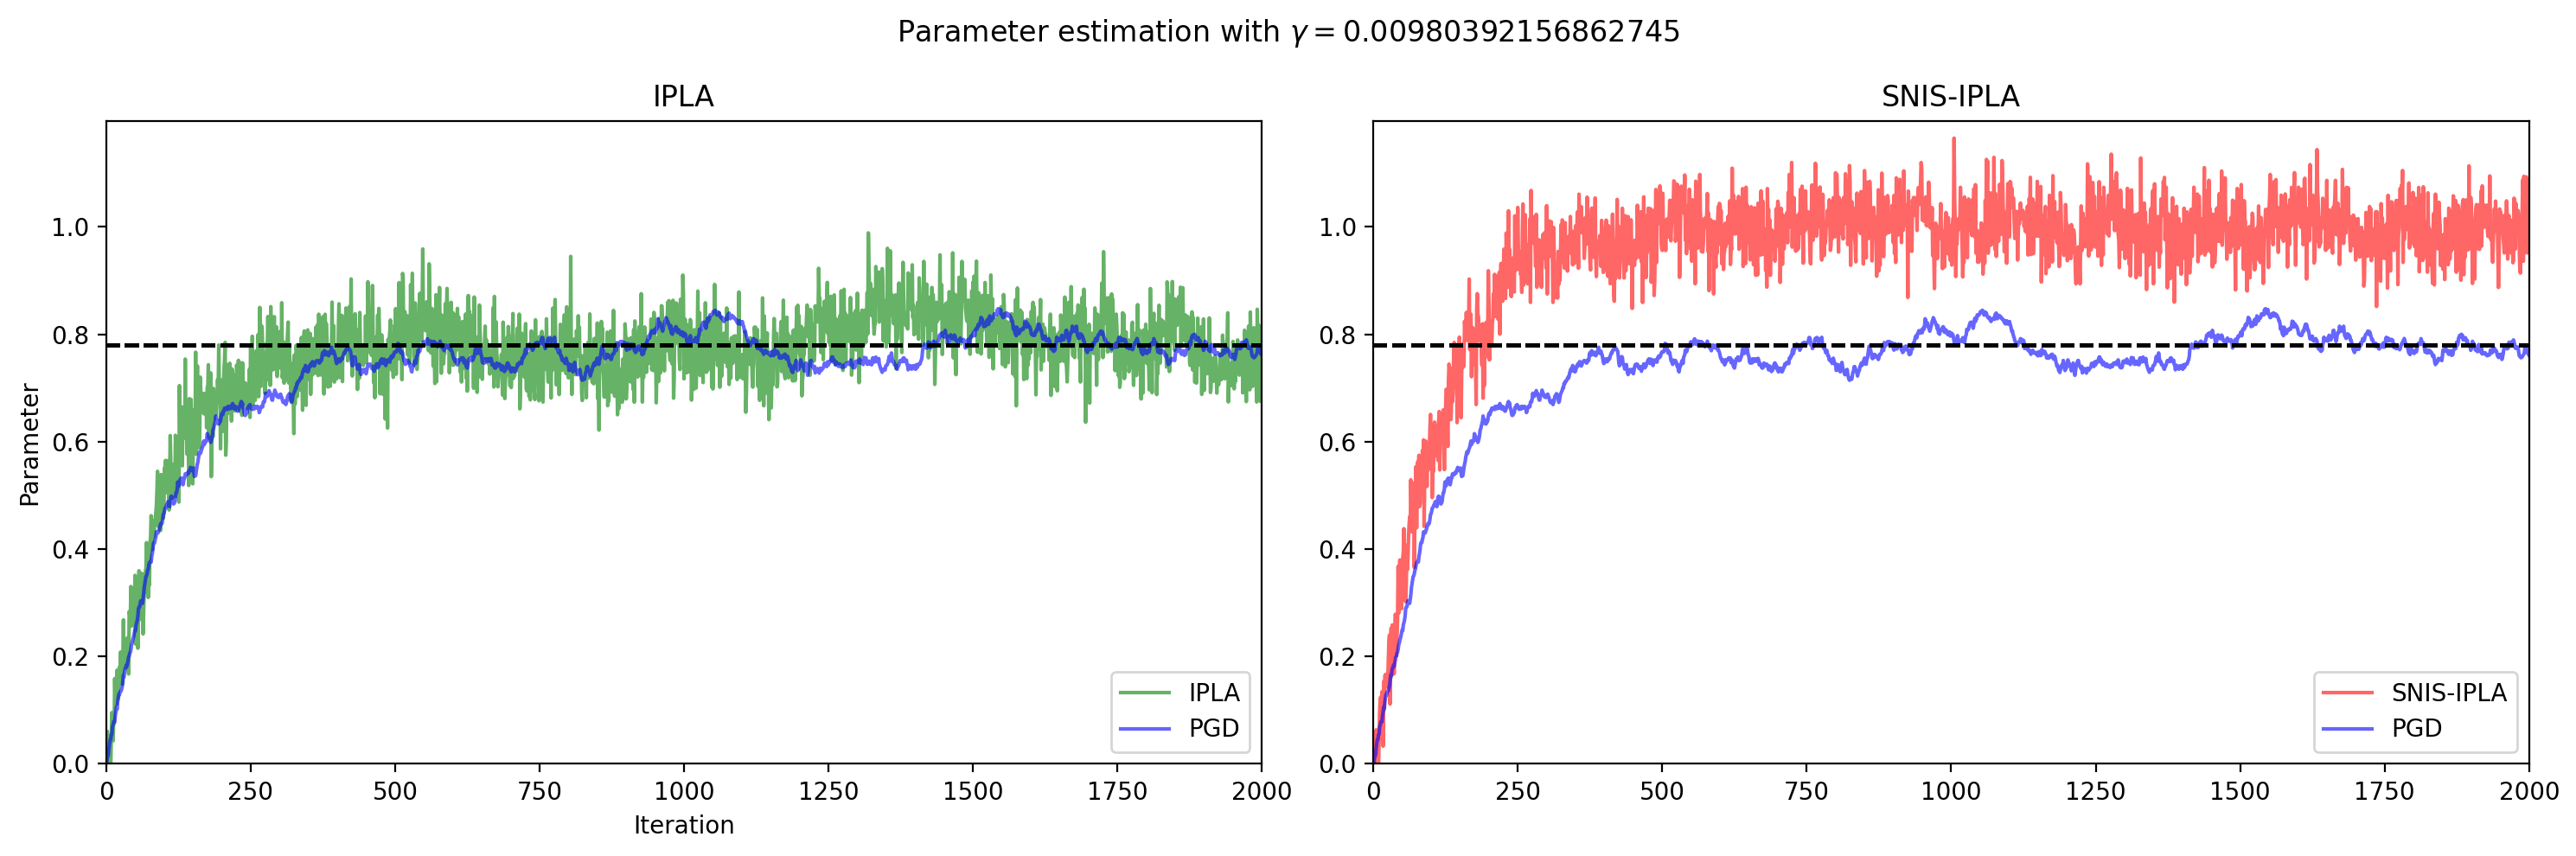

In [18]:
# Plot the results
plt.figure(figsize=(10, 5))
# make two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(IPLA_test_opt_gamma.thetas, color = "green", label="IPLA", alpha=0.6)
ax2.plot(SNIS_IPLA_test.thetas, color = "red", label="SNIS-IPLA", alpha=0.6)
ax1.plot(PGD_test_opt_gamma.thetas, color = "blue", label="PGD", alpha=0.6)
ax1.plot([best_theta]*nsteps, '--', color = "black")
ax2.plot(PGD_test_opt_gamma.thetas, color = "blue", label="PGD", alpha=0.6)
ax2.plot([best_theta]*nsteps, '--', color = "black")
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Parameter')
ax1.set_xlim([0, nsteps])
ax1.set_ylim([0, 1.2*y.mean()])
ax1.set_title(f'IPLA')
ax1.legend(loc="lower right")
ax2.set_title(f'SNIS-IPLA')
ax2.legend(loc="lower right")
ax2.set_xlim([0, nsteps])
ax2.set_ylim([0, 1.2*y.mean()])
fig.suptitle(f"Parameter estimation with $\gamma = {gamma_SNIS}$")
fig.tight_layout()
plt.show()